In [6]:
import pandas as pd

# Load the dataset
df = pd.read_csv('/content/Amazon Sales data.csv')
df.head()


,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
0,Australia and Oceania,Tuvalu,Baby Food,Offline,H,5/28/2010,669165933,6/27/2010,9925,255.28,159.42,2533654.00,1582243.50,951410.50
1,Central America and the Caribbean,Grenada,Cereal,Online,C,8/22/2012,963881480,9/15/2012,2804,205.70,117.11,576782.80,328376.44,248406.36
2,Europe,Russia,Office Supplies,Offline,L,5/2/2014,341417157,5/8/2014,1779,651.21,524.96,1158502.59,933903.84,224598.75
3,Sub-Saharan Africa,Sao Tome and Principe,Fruits,Online,C,6/20/2014,514321792,7/5/2014,8102,9.33,6.92,75591.66,56065.84,19525.82
4,Sub-Saharan Africa,Rwanda,Office Supplies,Offline,L,2/1/2013,115456712,2/6/2013,5062,651.21,524.96,3296425.02,2657347.52,639077.50


In [11]:
# Check for missing values
print(df.isnull().sum())

# Drop rows with missing values
df.dropna(inplace=True)
data.shape

# Check for duplicate rows
print(df.duplicated().sum())

# Drop duplicate rows
df.drop_duplicates(inplace=True)
data.shape



Region            0
Country           0
Item Type         0
Sales Channel     0
Order Priority    0
Order Date        0
Order ID          0
Ship Date         0
Units Sold        0
Unit Price        0
Unit Cost         0
Total Revenue     0
Total Cost        0
Total Profit      0
dtype: int64
0


(100, 14)

In [22]:
# Convert date column to datetime
df['Order Date'] = pd.to_datetime(df['Order Date'])

# Extract year and month from the order_date
df['year'] = df['Order Date'].dt.year
df['month'] = df['Order Date'].dt.month
df['year_month'] = df['Order Date'].dt.to_period('M')
print(df.head())


                              Region                Country        Item Type  \
0              Australia and Oceania                 Tuvalu        Baby Food   
1  Central America and the Caribbean                Grenada           Cereal   
2                             Europe                 Russia  Office Supplies   
3                 Sub-Saharan Africa  Sao Tome and Principe           Fruits   
4                 Sub-Saharan Africa                 Rwanda  Office Supplies   

  Sales Channel Order Priority Order Date   Order ID  Ship Date  Units Sold  \
0       Offline              H 2010-05-28  669165933  6/27/2010        9925   
1        Online              C 2012-08-22  963881480  9/15/2012        2804   
2       Offline              L 2014-05-02  341417157   5/8/2014        1779   
3        Online              C 2014-06-20  514321792   7/5/2014        8102   
4       Offline              L 2013-02-01  115456712   2/6/2013        5062   

   Unit Price  Unit Cost  Total Revenue  Tot

In [28]:
# Load cleaned data into a new DataFrame
cleaned_df = df.copy()
df.columns

Index(['Region', 'Country', 'Item Type', 'Sales Channel', 'Order Priority',
       'Order Date', 'Order ID', 'Ship Date', 'Units Sold', 'Unit Price',
       'Unit Cost', 'Total Revenue', 'Total Cost', 'Total Profit', 'year',
       'month', 'year_month'],
      dtype='object')

<Axes: title={'center': 'Month-wise Sales Trend'}, xlabel='month'>

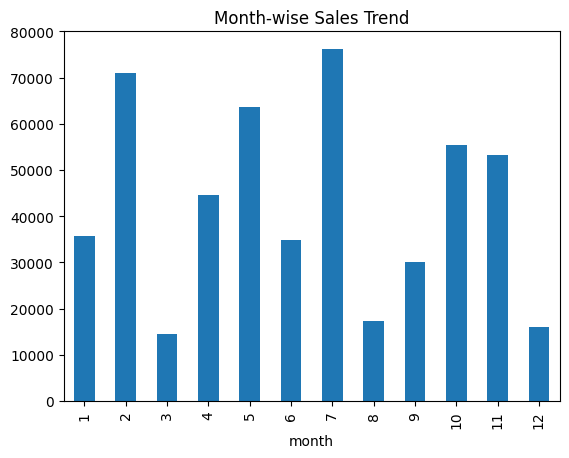

In [34]:
# Group by month and calculate total sales of the 'Amount' column
month_wise_sales = cleaned_df.groupby('month')['Units Sold'].sum()
# Plot the month-wise sales trend
month_wise_sales.plot(kind='bar', title='Month-wise Sales Trend')




<Axes: title={'center': 'Year-wise Sales Trend'}, xlabel='year'>

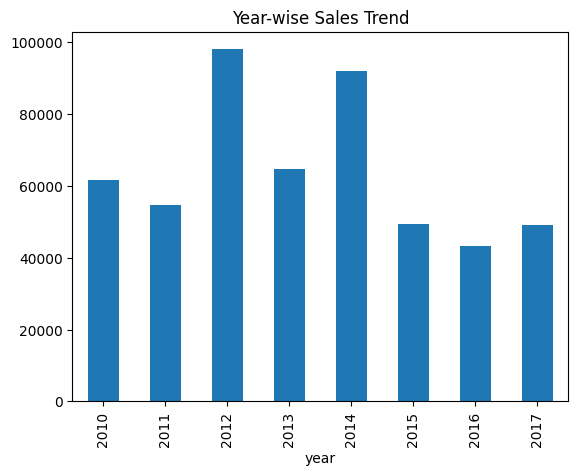

In [35]:
# Group by year and calculate total sales
year_wise_sales = cleaned_df.groupby('year')['Units Sold'].sum()

# Plot the year-wise sales trend
year_wise_sales.plot(kind='bar', title='Year-wise Sales Trend')


<Axes: title={'center': 'Yearly Month-wise Sales Trend'}, xlabel='year_month'>

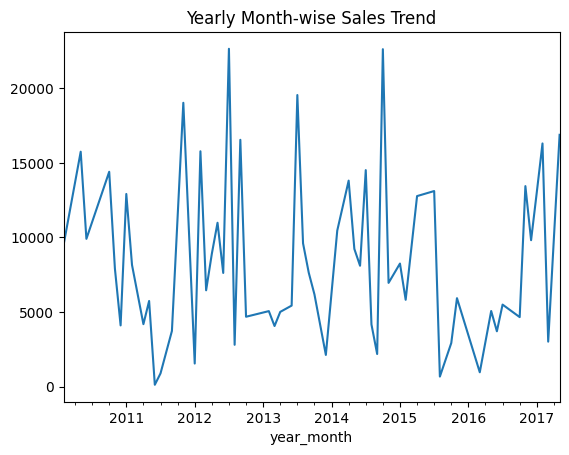

In [36]:
# Group by year_month and calculate total sales
yearly_month_wise_sales = cleaned_df.groupby('year_month')['Units Sold'].sum()

# Plot the yearly month-wise sales trend
yearly_month_wise_sales.plot(kind='line', title='Yearly Month-wise Sales Trend')


In [38]:
# Calculate total sales, average sales, and number of orders
total_sales = cleaned_df['Units Sold'].sum()
average_sales = cleaned_df['Units Sold'].mean()
num_orders = cleaned_df['Order ID'].nunique()

print(f'Total Sales: {total_sales}')
print(f'Average Sales: {average_sales}')
print(f'Number of Orders: {num_orders}')


Total Sales: 512871
Average Sales: 5128.71
Number of Orders: 100


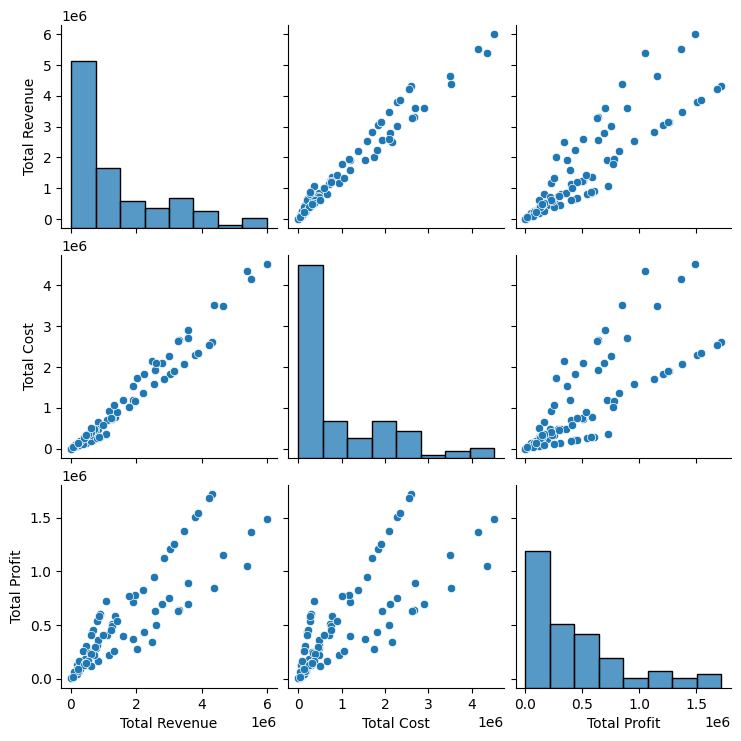

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot relationships between sales and other attributes
sns.pairplot(cleaned_df[["Total Revenue","Total Cost","Total Profit"]])
plt.show()
